In [15]:
from pyprocessmacro import Process
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("heart_data.csv")
p = Process(data=df, model=1, x="cholesterol", y= "mbp", m= "gender")
p.summary()

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 1

Variables:
    Cons = Cons
    x = cholesterol
    y = mbp
    m = gender

Sample size:
70000

***************************** OUTCOME MODELS ****************************

Outcome = mbp 
OLS Regression Summary

     R²  Adj. R²        MSE       F  df1    df2  p-value
 0.0013   0.0012 18618.0717 29.6681    3  69996   0.0000

Coefficients

                     coeff     se       t      p    LLCI    ULCI
Cons               93.1189 3.4765 26.7855 0.0000 86.3052 99.9327
cholesterol         5.4761 2.2764  2.4056 0.0162  1.0144  9.9378
gender              4.0936 2.4427  1.6758 0.0938 -0.6940  8.8812
cholesterol*gender  0.6656 1.6219  0.4104 0.6815 -2.5134  3.8445

-------------------------------------------------------------------------


********************** CONDITIONAL EFFECTS **********************



# Variable Definitions
- X --> Cholesterol (scale of 1 to 3): total cholesterol level read as mg/dl on a scale 0 - 5+ units( integer). Each unit denoting increase/decrease by 20 mg/dL respectively.
- Y --> Mean blood pressure (mbp): Formula of DBP + 0.333(SBP-DBP)
- M --> Gender: male denoted by 1.0, female denoted by 2.0

# Formula
Y = B0 + B1X + B2M + B3XM
- MBP = 93.1189 + 5.4761(Cholesterol) + 4.0936(Gender) + 0.6656(Cholesterol * Gender)

# Overall Model Fit
- R^2 = 0.0013
- Adjusted R^2 = 0.0012
- Interpretation: The model explains a small proportion of the variance

- MSE = 0.0717
- p < 0.00001

# Coefficients
- Cholesterol --> p < 0.00001 suggests a statistically significant effect of cholesterol on MBP
- Gender --> p = 0.0938, therefore gender does not have a statistically significant (given a = 0.05) effect on MBP
- Cholesterol * Gender --> p = 0.6815, therefore the interaction terms does not have a statistically significant (given a = 0.05) effect on MBP


# Conditional Effects
Interpretation:
- For cases where the gender is male, the estimated effect of a one-unit change in cholesterol on MBP is 6.1417.
- For cases where the gender is female, the estimated effect of a one-unit change in cholesterol on MBP is 6.8072.
- p < 0.00001 for both genders --> statistical significant effect for both genders driving the effect of cholesterol on MBP

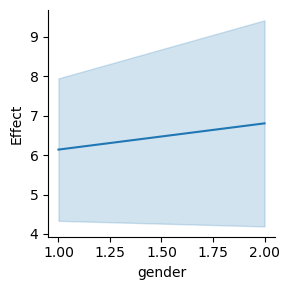

In [19]:
g = p.plot_conditional_direct_effects(x="gender") 
plt.show()

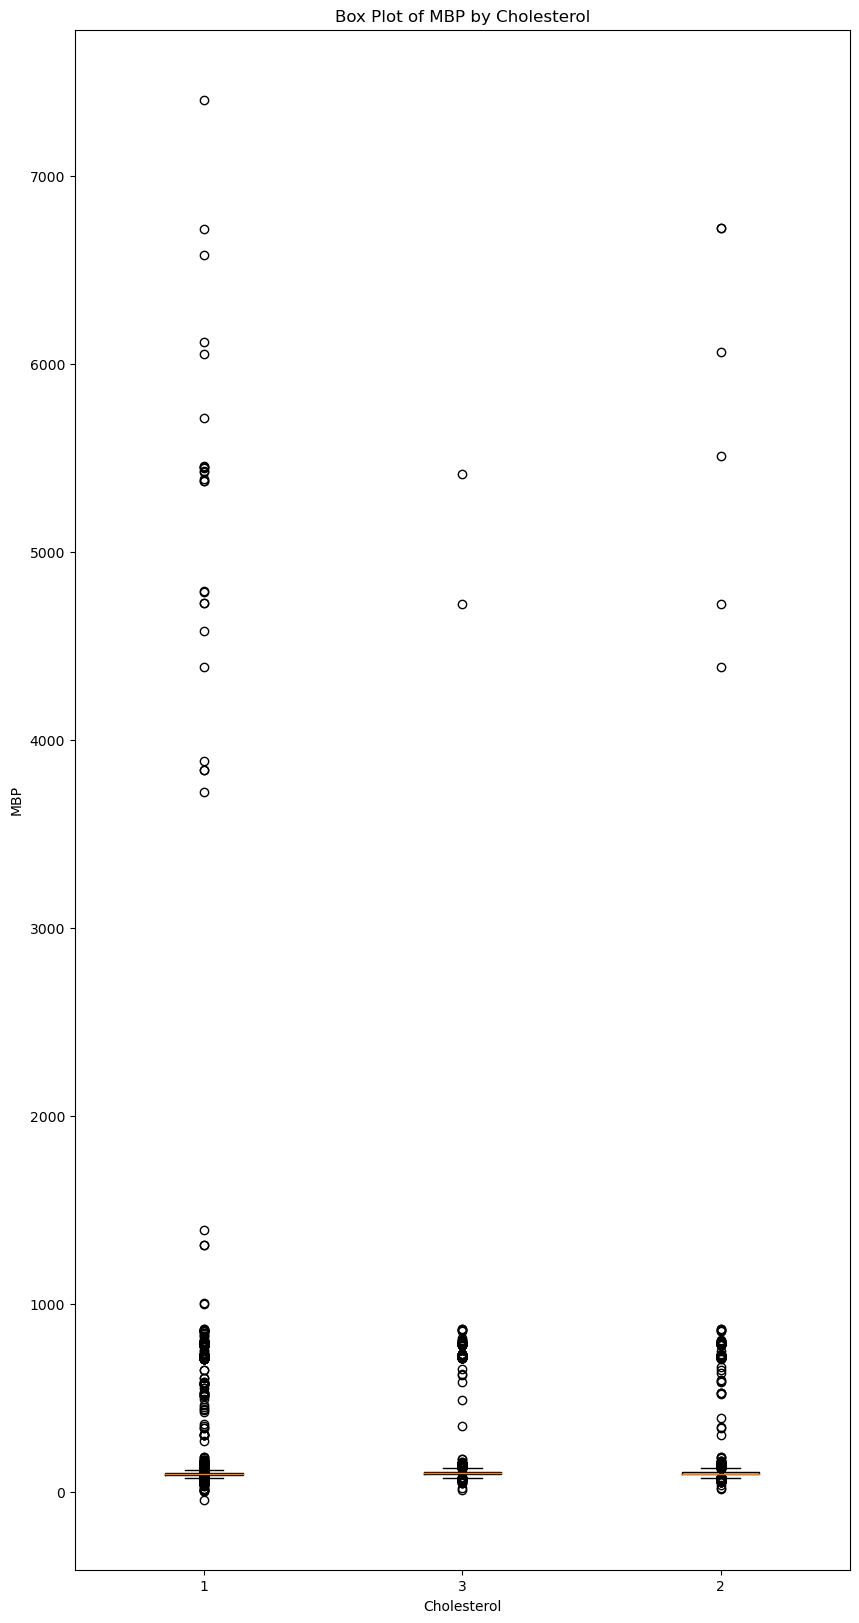

In [32]:
cholesterol = 'cholesterol'
mbp = 'mbp'

plt.figure(figsize=(10, 20))
plt.boxplot([df[df[cholesterol] == category][mbp] for category in df[cholesterol].unique()],
            labels=df[cholesterol].unique())
plt.title('Box Plot of MBP by Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('MBP')
plt.show()